# **EDA ON CAR PRICE DATASET**

# Import Package

In [48]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Read data

In [2]:
train = pd.read_csv('./train.csv')

# Data Cleaning and Preprocessing

In [3]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,188533.0,94266.000000,54424.933488,0.0,47133.0,94266.0,141399.0,188532.0
model_year,188533.0,2015.829998,5.660967,1974.0,2013.0,2017.0,2020.0,2024.0
milage,188533.0,65705.295174,49798.158076,100.0,24115.0,57785.0,95400.0,405000.0
price,188533.0,43878.016178,78819.522254,2000.0,17000.0,30825.0,49900.0,2954083.0


In [6]:
train.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [7]:
numerical_column_names = train.select_dtypes(include=['number']).columns

print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['id', 'model_year', 'milage', 'price']


In [8]:
object_column_names = train.select_dtypes(include=['object']).columns

print("Object Column Names:", object_column_names.tolist())

Object Column Names: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [9]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [10]:
print("Duplicated Rows:",train.duplicated().sum())

Duplicated Rows: 0


In [11]:
print("Number of Rows:",train.shape[0])

Number of Rows: 188533


In [12]:
print("Number of Columns:",train.shape[1])

Number of Columns: 13


In [13]:
train.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [14]:
categorical_columns = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

In [16]:
for col in categorical_columns:
    print(f"Category in {col} is : {train[col].unique()}")
    
    print("<--- --- --- --- --- --- --- --- --- --->")

Category in brand is : ['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']
<--- --- --- --- --- --- --- --- --- --->
Category in model is : ['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']
<--- --- --- --- --- --- --- --- --- --->
Category in fuel_type is : ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
<--- --- --- --- --- --- --- --- --- --->
Category in engine is : ['172.0HP 1.6L 4 Cylinder Engine Ga

In [17]:
for col in categorical_columns:
    print(f"Category in {col} is : {train[col].value_counts()}")
    
    print("<--- --- --- --- --- --- --- --- --- --->")

Category in brand is : brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston

In [18]:
train.drop('id', axis = 1, inplace = True)

# Handling Null value

In [19]:
train['clean_title'] = train['clean_title'].fillna('No')

train['accident'] = train['accident'].fillna('No Data')

In [20]:
mode_value = train['fuel_type'].mode()[0]

train['fuel_type'].fillna(mode_value, inplace=True)

# Univariate Analysis

In [21]:
print("Average Milage of the car:",train['milage'].mean().round(2))

Average Milage of the car: 65705.3


In [22]:
print("Maximum Milage of the car:",train['milage'].max())

Maximum Milage of the car: 405000


In [23]:
print("Average Price of the car:",train['price'].mean().round(2))

Average Price of the car: 43878.02


In [24]:
print("Maximum Price of the car:",train['price'].max())

Maximum Price of the car: 2954083


# Exploratory Data Analysis

# 1.1 Categorical Feature

## **BRAND COUNT DISTRIBUTION**

In [25]:
brand_counts = train['brand'].value_counts().reset_index().head(10)

brand_counts.columns = ['brand', 'count']

In [26]:
fig = px.bar(brand_counts, x='brand', y='count', 
             title='Top 10 Brand',
             labels={'brand': 'Brand', 'count': 'Count'},
             color='count',  
             color_continuous_scale='Viridis'  
)

fig.update_layout(
    xaxis_title='Brand',
    yaxis_title='Count',
    width=600,  
    height=600   
)

fig.show()

---

## **MODEL COUNT DISTRIBUTION**

In [27]:
model_counts = train['model'].value_counts().reset_index().head(10)

model_counts.columns = ['model', 'count']

In [28]:
fig = px.bar(model_counts, x='model', y='count', 
             title='Top 10 Model',
             labels={'model': 'Model', 'count': 'Count'},
             color='count',  
             color_continuous_scale='Viridis'  
)

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Count',
    width=600,  
    height=600,
)

fig.show()

---

## **FUEL COUNT DISTRIBUTION**

In [29]:
fuel_counts = train['fuel_type'].value_counts().reset_index()

fuel_counts.columns = ['fuel_type', 'count']

In [30]:
fig = px.bar(fuel_counts, x='fuel_type', y='count', 
             title='Distribution of Fuel Count',
             labels={'fuel_type': 'Fuel Type', 'count': 'Count'},
             color='count',  
             color_continuous_scale='Viridis'  
)

fig.update_layout(
    xaxis_title='Fuel Type',
    yaxis_title='Count',
    width=600,  
    height=500,
)

fig.show()

---

## **TRANSMISSION TYPE DISTRIBUTION**

In [31]:
transmission_counts = train['transmission'].value_counts().reset_index().head(10)
transmission_counts.columns = ['transmission', 'count']

In [32]:
fig = px.bar(transmission_counts, x='transmission', y='count', 
             title='Distribution of Transmission Type',
             labels={'transmission': 'Transmission Type', 'count': 'Count'},
             color='count', 
             color_continuous_scale='Viridis'  
)

fig.update_layout(
    xaxis_title='Transmission Type',
    yaxis_title='Count',
    width=600,  
    height=600,
)

fig.show()

---

## **INTERIOR COLOR CATEGORY DISTRIBUTION**

In [33]:
int_col_counts = train['int_col'].value_counts().reset_index().head(10)

int_col_counts.columns = ['int_col', 'count']

In [34]:
fig = px.bar(int_col_counts, x='int_col', y='count', 
             title='Distribution of Interior Color Category',
             labels={'int_col': 'Color', 'count': 'Count'},
             color='count',  
             color_continuous_scale='Viridis'  
)

fig.update_layout(
    xaxis_title='Color',
    yaxis_title='Count',
    width=600,  
    height=500,
)

fig.show()

---

## **EXTERIOR COLOR CATEGORY DISTRIBUTION**

In [35]:
ext_col_counts = train['ext_col'].value_counts().reset_index().head(10)

ext_col_counts.columns = ['ext_col', 'count']

In [36]:
fig = px.bar(ext_col_counts, x='ext_col', y='count', 
             title='Distribution of Exterior Color Category',
             labels={'ext_col': 'Color', 'count': 'Count'},
             color='count',  
             color_continuous_scale='Viridis'  
)

fig.update_layout(
    xaxis_title='Color',
    yaxis_title='Count',
    width=600,  
    height=500,
)

fig.show()

---

## **ACCIDENT COUNT DISTRIBUTION**

In [37]:
accident_counts = train['accident'].value_counts().reset_index()

accident_counts.columns = ['accident', 'count']

In [38]:
fig = px.pie(accident_counts, names='accident', values='count',
             title='Distribution of Accident Reports',
             color='count'
)

fig.update_layout(
    width=700,  
    height=700,
    legend_title='Accident Type'  
)

fig.show()

---

## **CLEAN TITLE COUNT DISTRIBUTION**

In [39]:
cleantitle_counts = train['clean_title'].value_counts().reset_index()

cleantitle_counts.columns = ['clean_title', 'count']

In [40]:
fig = px.pie(cleantitle_counts, names='clean_title', values='count',
             title='Distribution of Clean Title',
             color='count'
)

fig.update_layout(
    width = 500,  
    height = 500,
    legend_title='clean_title'  
)

fig.show()

# 2.2 Numerical Features

In [41]:
numerical_columns = ['model_year', 'milage', 'price']

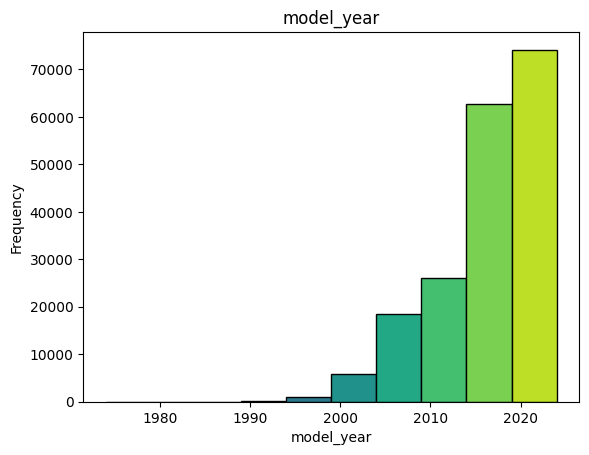

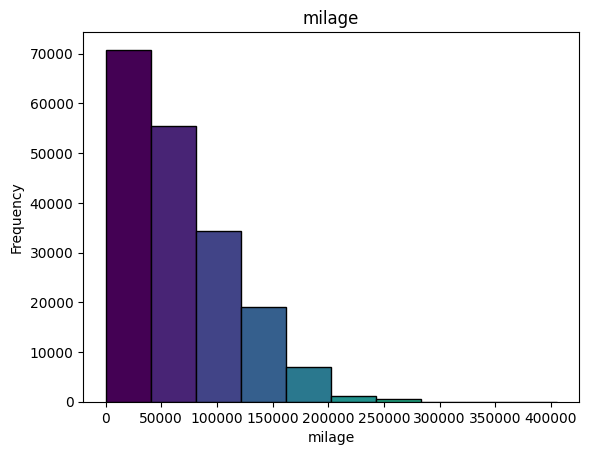

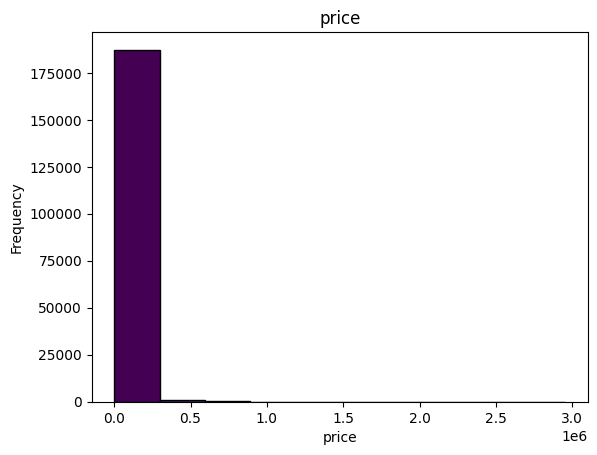

In [50]:
for column in numerical_columns:
    plt.figure()
    n, bins, patches = plt.hist(train[column], bins=10, edgecolor='black')
    cmap = plt.get_cmap('viridis')
    for i, patch in enumerate(patches):
        color = cmap(i / len(patches))
        patch.set_facecolor(color)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

---

## **AVERAGE PRICE BY CAR BRAND**

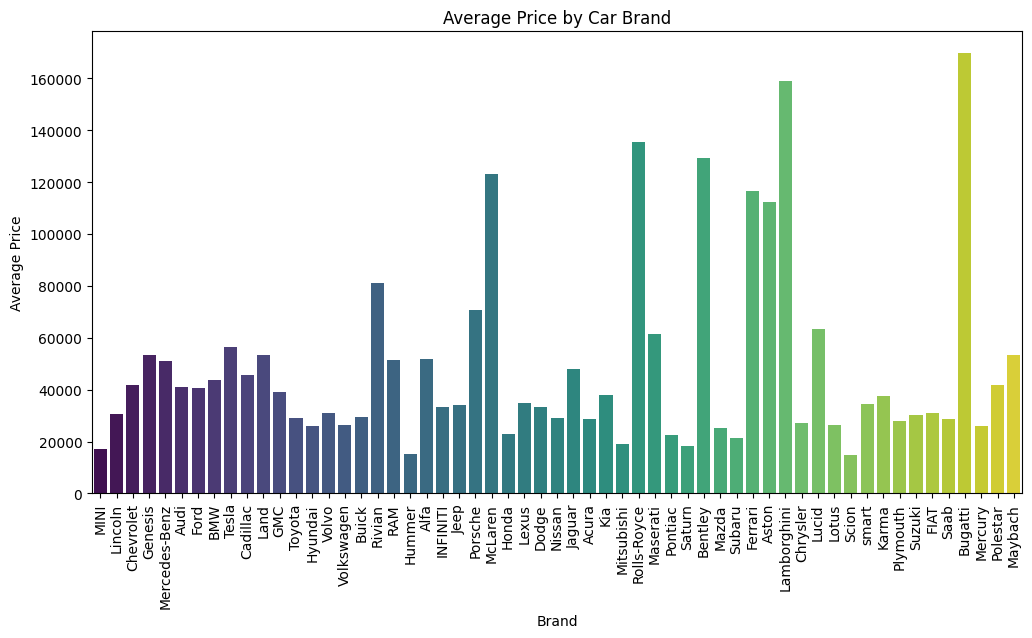

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=train, errorbar=None, palette='viridis')
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

---

## **AVERAGE PRICE BY MODEL YEAR**

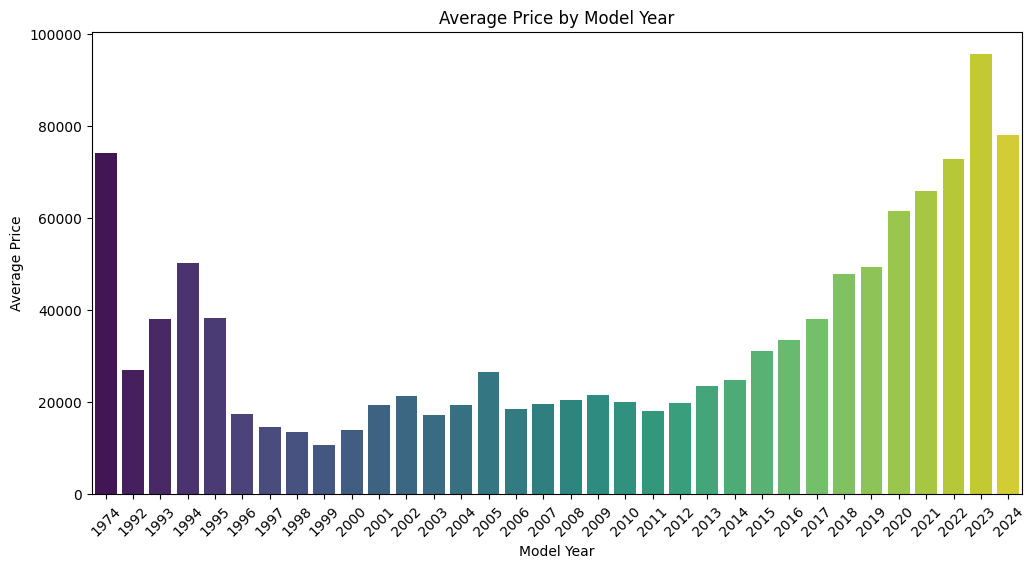

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='price', data=train, errorbar=None, palette='viridis')
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

---

## **AVERAGE PRICE BY TRANSMISSION TYPE**

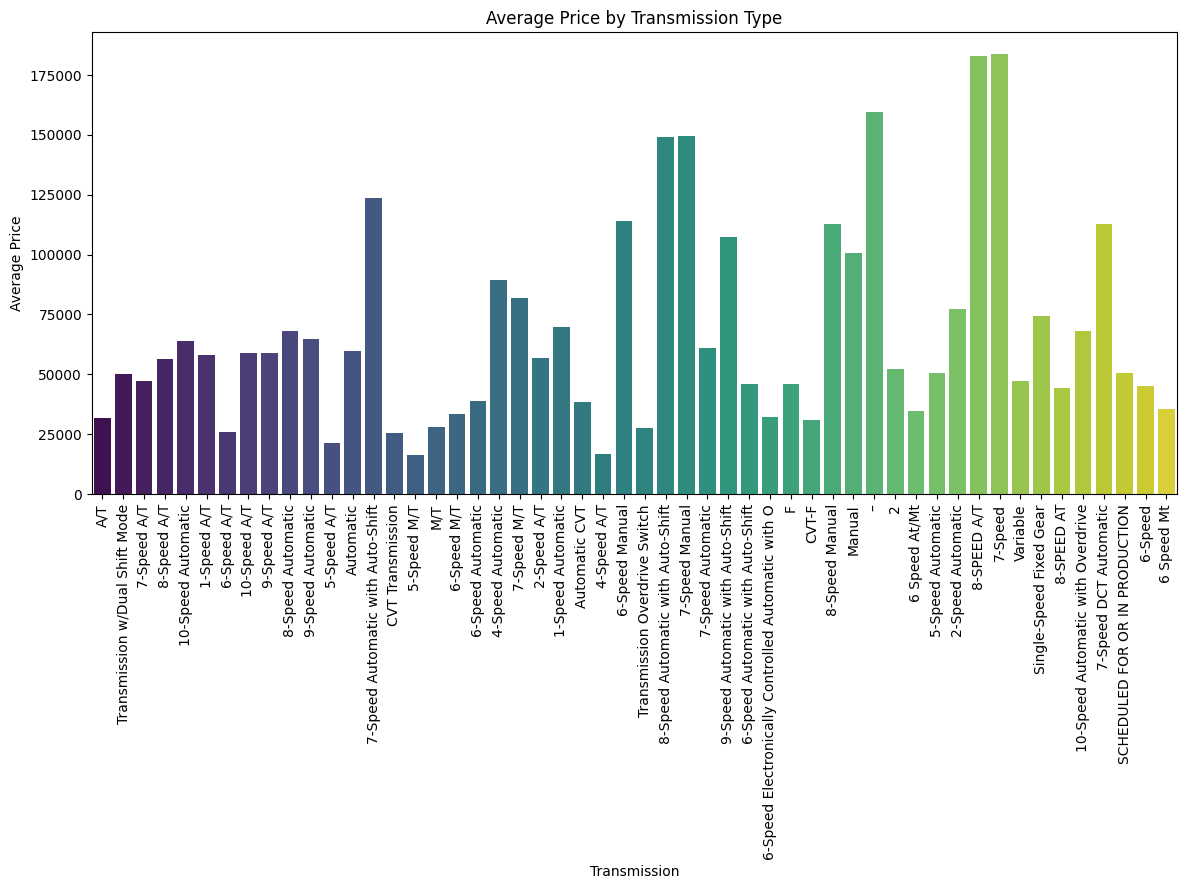

In [54]:
plt.figure(figsize=(14, 6))
sns.barplot(x='transmission', y='price', data=train, errorbar=None, palette='viridis')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

---

# Conclusion

* The dataset contains 188,533 rows and 13 columns, with no duplicated rows. 
* There are four numerical columns (id, model_year, milage, price) and nine object columns. 
* The fuel_type, accident, and clean_title columns have missing values. 
* The most frequent brand and model occur 57 and 1,897 times, respectively. 
* The average mileage of the cars is 65,705.3, with a maximum of 405,000. 
* The average price is 43,878.02(dollors), with a maximum price of 2,954,083(dollors).

----